# Chapter 10

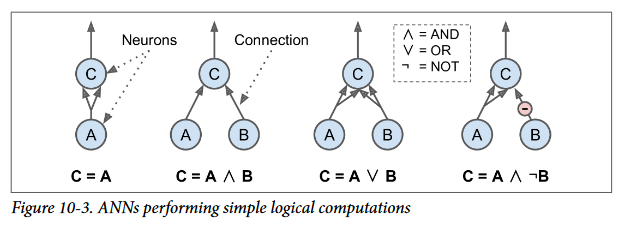

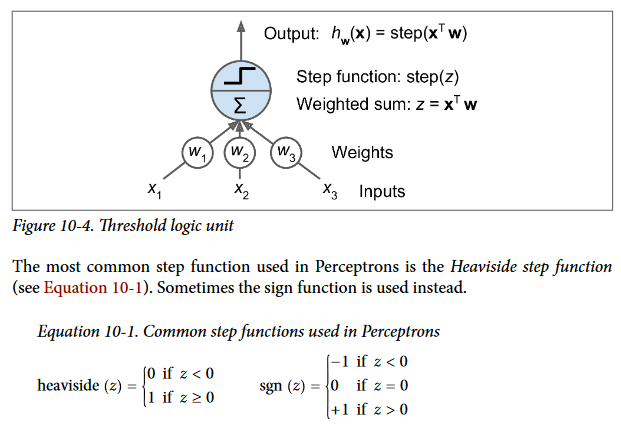

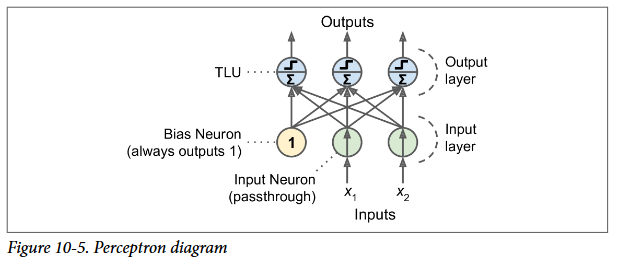

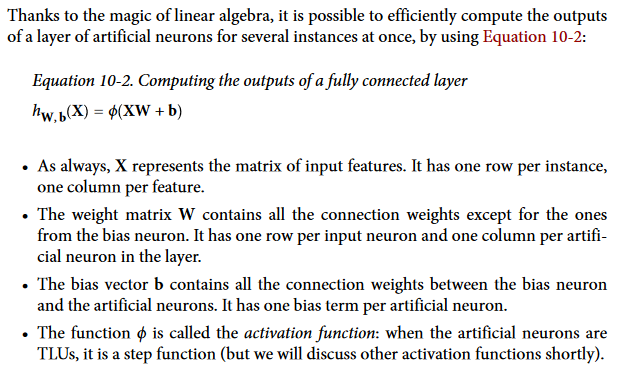

In [ ]:
#Scikit-Learn  provides  a  Perceptron  class  that  implements  a  single  TLU  network. 
#Itcan be used pretty much as you would expect—for example, on the iris dataset (intro‐duced in Chapter 4):

import numpy as np
from sklearn.datasets import  load_iris
from sklearn.linear_model import  Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [ ]:
y_pred

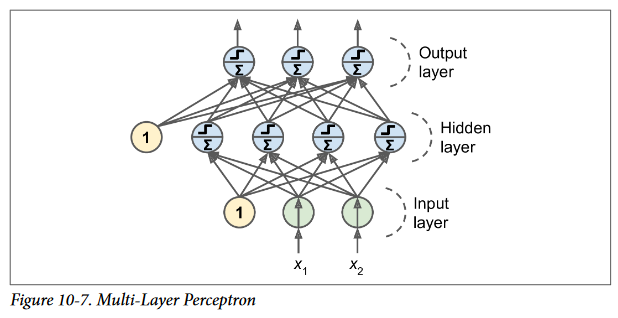

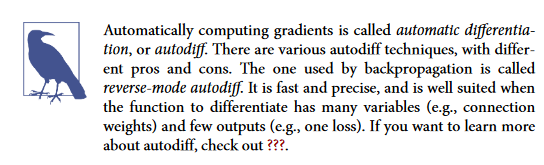

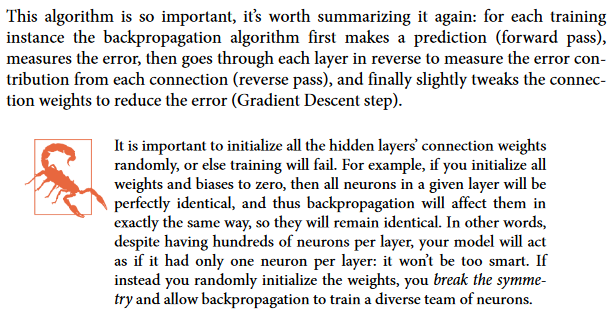

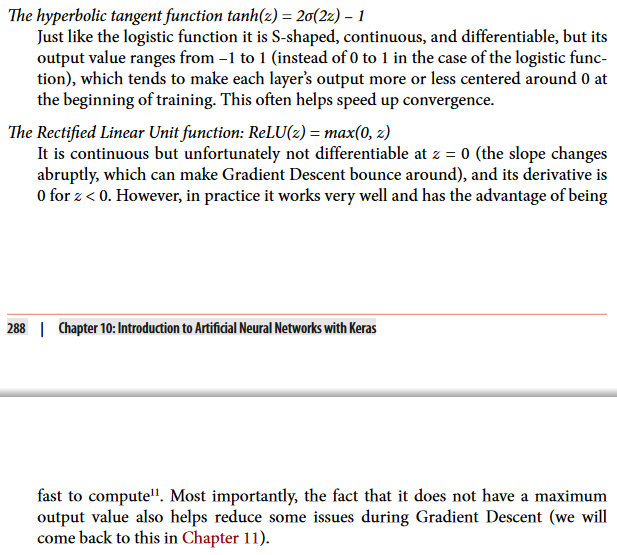

# Regression MLPs

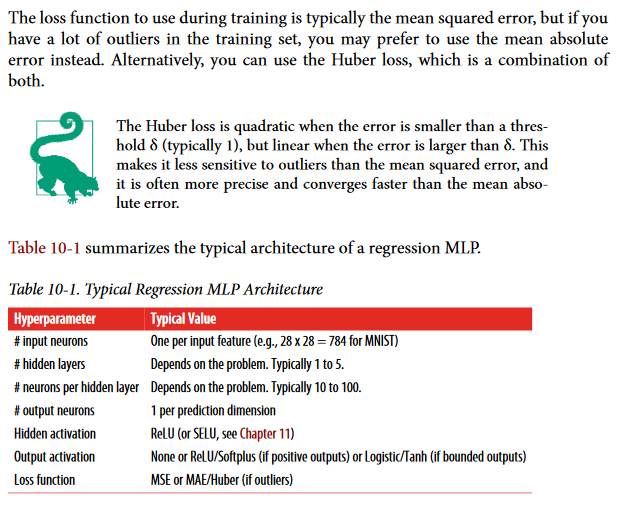

# Classification MLPs

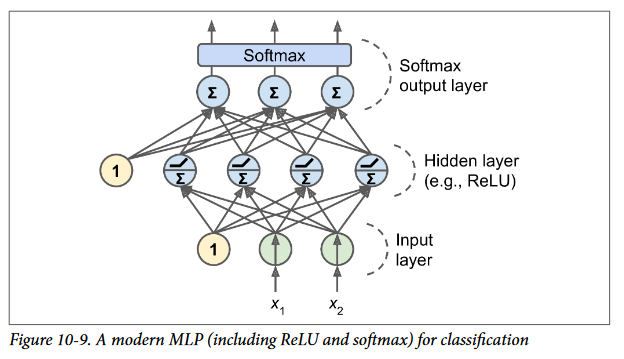

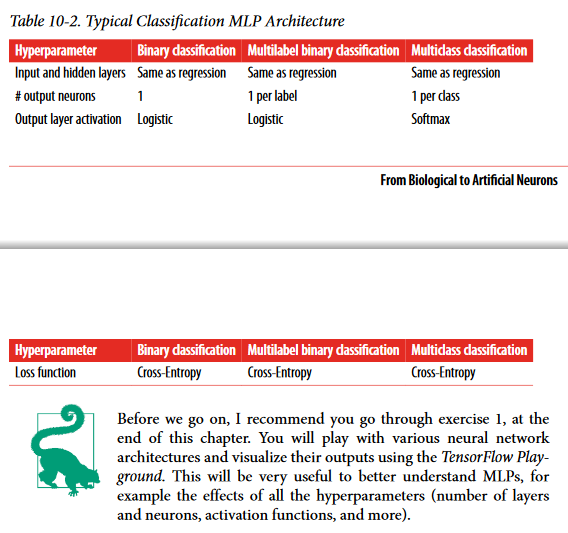

# Tensorflow Playground

https://playground.tensorflow.org/

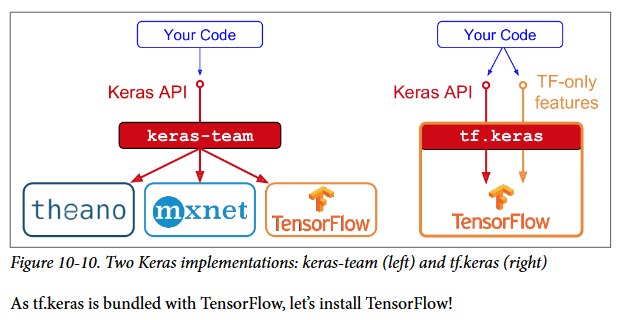

# Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# every image is represented as a 28×28 array
# the pixel intensities are represented as integers (from 0 to 255)

In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [53]:
class_names[y_train[9]]

'Coat'

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# List of Activation Functions https://keras.io/api/layers/activations/

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#pip install pydot

In [ ]:
#pip install graphviz

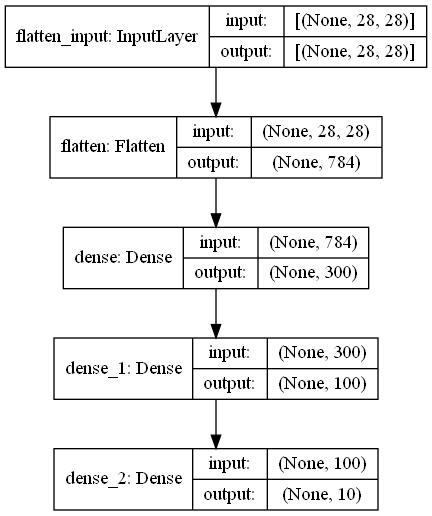

In [7]:
keras.utils.plot_model(model,to_file='graph.png', show_shapes=True)

import pydot as pydot
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model,to_file='graph.png', show_shapes=True)

#('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')

In [40]:
# for the full lists see https://keras.io/losses/,https://keras.io/optimizers/ and https://keras.io/metrics/.
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7150 - accuracy: 0.7653 - val_loss: 0.5172 - val_accuracy: 0.8240
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4860 - accuracy: 0.8304 - val_loss: 0.4649 - val_accuracy: 0.8376
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4404 - accuracy: 0.8457 - val_loss: 0.4203 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4117 - accuracy: 0.8549 - val_loss: 0.4223 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3934 - accuracy: 0.8623 - val_loss: 0.3846 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8679 - val_loss: 0.3715 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3624 - accuracy: 0.8729 - val_loss: 0.3683 - val_accuracy:

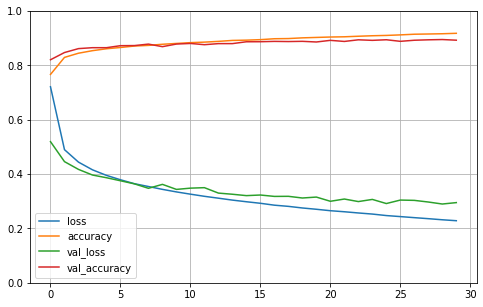

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 78.5655 - accuracy: 0.8286


[78.56552124023438, 0.8285999894142151]

In [60]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [61]:
import numpy as np
np.argmax(y_proba[9])

7

In [55]:
y_test[9]

7

In [56]:
class_names[y_train[7]]

'Coat'

y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

# Building a Regression MLP Using the Sequential API

In [67]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_new.shape

(3, 8)

In [ ]:
input_shape

In [80]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="sgd", metrics = "mae")
history = model.fit(X_train_scaled, y_train, epochs=20, steps_per_epoch = round(11610/32), batch_size = 32,
                    validation_data=(X_valid_scaled, y_valid), validation_steps = round(3870/32))

mse_test = model.evaluate(X_test_scaled, y_test)

X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8970 - mae: 0.6420 - val_loss: 0.5549 - val_mae: 0.5306
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5483 - mae: 0.5242 - val_loss: 0.9202 - val_mae: 0.5046
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2920 - mae: 0.5456 - val_loss: 0.4427 - val_mae: 0.4648
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4426 - mae: 0.4681 - val_loss: 0.4271 - val_mae: 0.4430
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4806 - mae: 0.4792 - val_loss: 0.8798 - val_mae: 0.4821
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4546 - mae: 0.4660 - val_loss: 0.3763 - val_mae: 0.4354
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3990 - mae: 0.4455 - val_loss: 0.3637 - val_mae: 0.4246
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

# Building Complex Models Using the Functional API

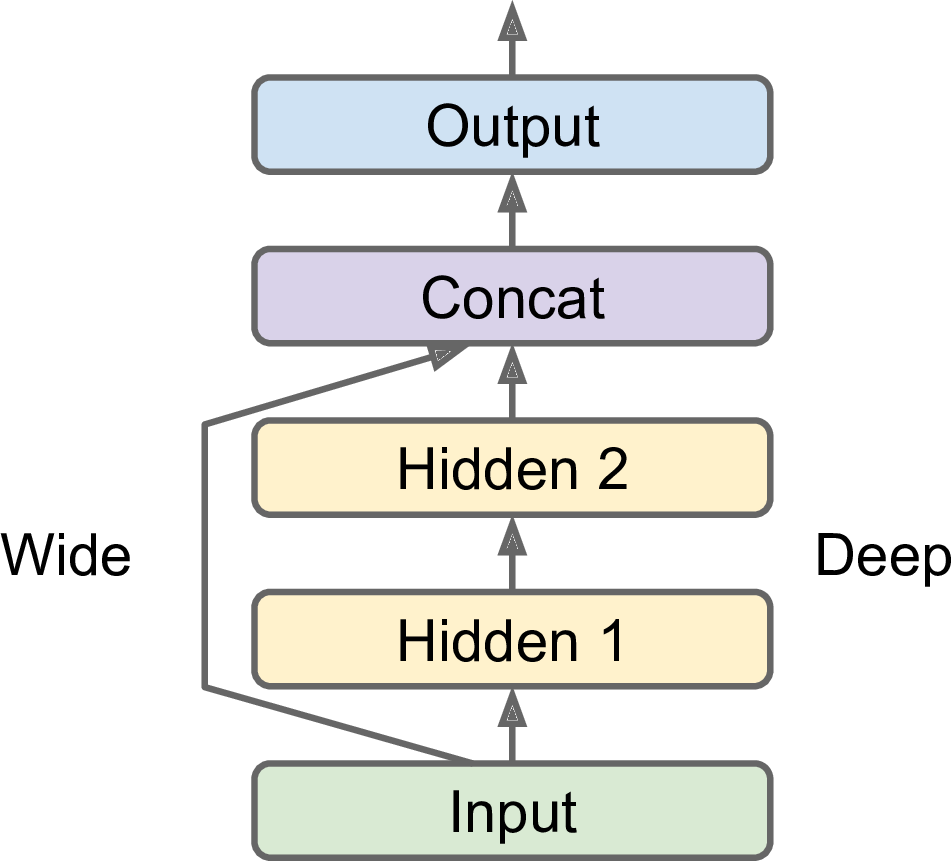


In [114]:
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [116]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_39 (Dense)                (None, 30)           270         input_8[0][0]                    
__________________________________________________________________________________________________
dense_40 (Dense)                (None, 30)           930         dense_39[0][0]                   
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 38)           0           input_8[0][0]                    
                                                                 dense_40[0][0]             

In [120]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))
y_pred = model.predict((X_new_A))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

ValueError: in user code:

    C:\Users\LENOVO\anaconda3\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\LENOVO\anaconda3\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LENOVO\anaconda3\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\LENOVO\anaconda3\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\LENOVO\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\LENOVO\anaconda3\lib\site-packages\keras\engine\input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_6: expected shape=(None, 8), found shape=(None, 5)


In [124]:
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

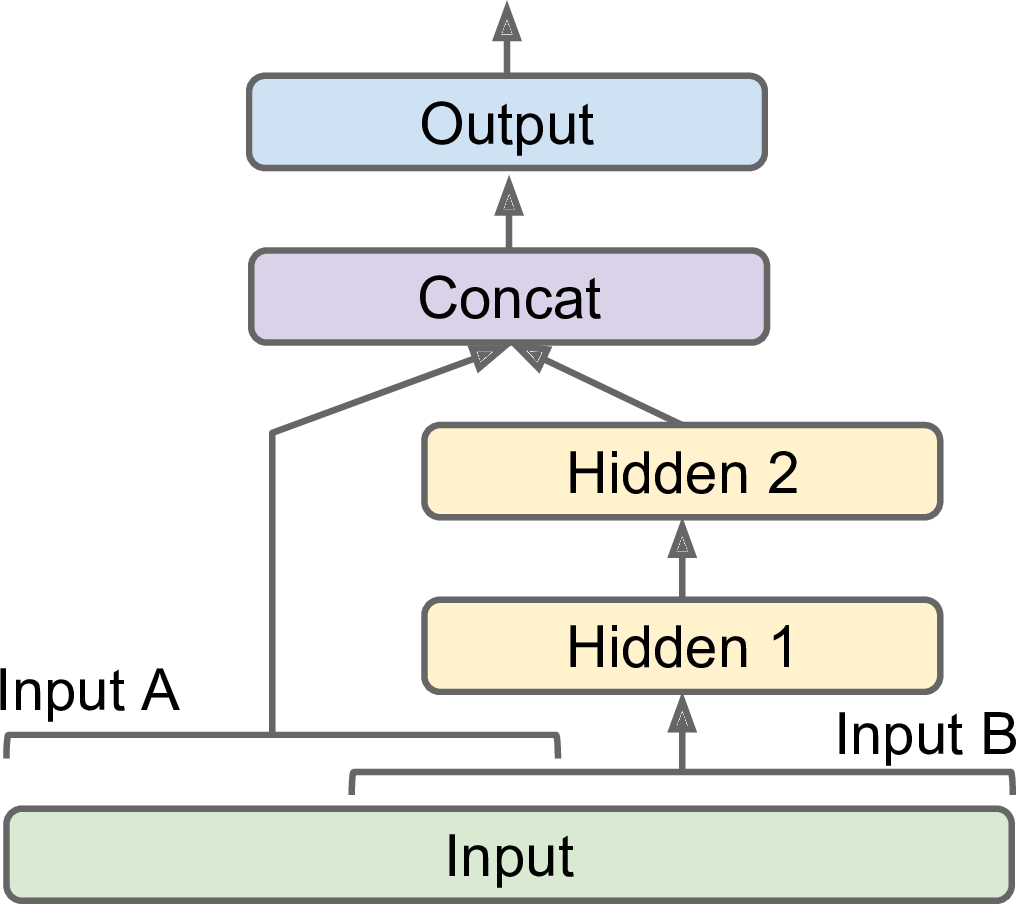

In [82]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [89]:
X_valid_A[0][4]

1566.0

In [92]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 812us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 827us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 880us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 845us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 800us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 828us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 829us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 859us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 790us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [====================

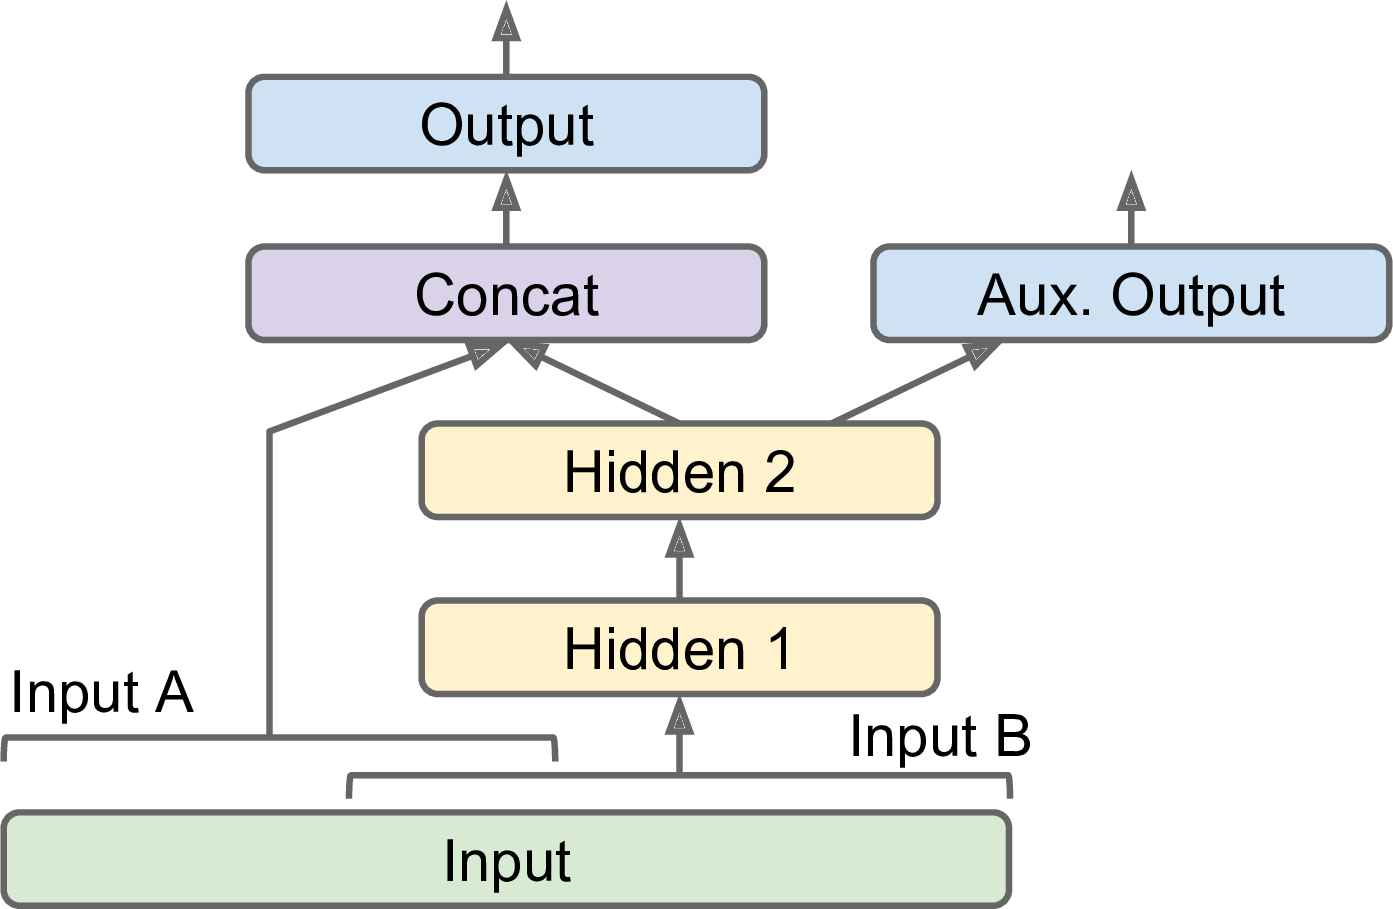

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [ ]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# Building Dynamic Models Using the Subclassing API

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

# Saving and Restoring a Model

In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

# Using Callbacks

In [ ]:
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best modelb

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
def on_epoch_end(self, epoch, logs):
print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# Visualization Using TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [ ]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [ ]:
[...] # Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])